# HomeWork #6

In [1]:
import pandas as pd
import numpy as np

In [2]:
house_df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv")
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Preparing the dataset

In [3]:
# ocean_proximity is either '<1H OCEAN' or 'INLAND'

house_df[(house_df['ocean_proximity'] == '<1H OCEAN') | (house_df['ocean_proximity'] == 'INLAND')]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df = house_df[house_df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]

In [5]:
# fill missing value with 0
df.loc[df['total_bedrooms'].isna(), 'total_bedrooms'] = 0

In [6]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
# Apply the log transform to median_house_value
df['median_house_value'] = np.log1p(df['median_house_value'])

<ipython-input-7-c8b817736595>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median_house_value'] = np.log1p(df['median_house_value'])


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df = df.reset_index(drop=True)

In [10]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [11]:
X_full, X_test, y_full, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full, y_full, test_size=.25, random_state=1)

In [12]:
print('X_train Shape : ', X_train.shape)
print('X_val Shape : ', X_val.shape)
print('X_test Shape : ', X_test.shape)

X_train Shape :  (9411, 9)
X_val Shape :  (3138, 9)
X_test Shape :  (3138, 9)


In [13]:
print('y_train Shape : ', y_train.shape)
print('y_val Shape : ', y_val.shape)
print('y_test Shape : ', y_test.shape)

y_train Shape :  (9411,)
y_val Shape :  (3138,)
y_test Shape :  (3138,)


In [14]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=True)

In [15]:
X_train.iloc[0]

longitude            -120.25
latitude               37.93
housing_median_age      13.0
total_rooms            493.0
total_bedrooms          76.0
population             196.0
households              68.0
median_income          3.375
ocean_proximity       INLAND
Name: 15321, dtype: object

In [16]:
X_train_dict = X_train.to_dict(orient='records')
X_val_dict = X_val.to_dict(orient='records')
X_test_dict = X_test.to_dict(orient='records')

In [17]:
X_train_dv = dv.fit_transform(X_train_dict).toarray()
X_val_dv = dv.transform(X_val_dict).toarray()
X_test_dv = dv.transform(X_test_dict).toarray()

In [18]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'population', 'total_bedrooms',
       'total_rooms'], dtype=object)

# Question 1

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt =  DecisionTreeRegressor(max_depth=1)

In [20]:
dt.fit(X_train_dv, y_train)

DecisionTreeRegressor(max_depth=1)

In [21]:
from sklearn.tree import plot_tree,export_text

In [22]:
for i, j in zip(dv.get_feature_names_out(), dt.feature_importances_):
  print(i, ':', j)

households : 0.0
housing_median_age : 0.0
latitude : 0.0
longitude : 0.0
median_income : 0.0
ocean_proximity=<1H OCEAN : 1.0
ocean_proximity=INLAND : 0.0
population : 0.0
total_bedrooms : 0.0
total_rooms : 0.0


In [23]:
feature = list(dv.get_feature_names_out())

In [24]:
print(export_text(dt, feature_names=feature))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



In [25]:
# Question 1 Answer: Ocean_Proximity are used to split the data

## model performance by using max_depth =1

In [26]:
train_pred = dt.predict(X_train_dv)

In [27]:
from sklearn.metrics import r2_score,mean_squared_error

In [28]:
np.sqrt(mean_squared_error(y_train, train_pred))

0.4522449592423713

In [29]:
r2_score(y_train, train_pred)

0.3639716393205953

In [30]:
def get_score(x, y):
  pred = dt.predict(x)
  r2_scor = r2_score(y, pred)
  rmse = np.sqrt(mean_squared_error(y, pred))
  return {'r2 score ':  r2_scor, 'rmse':rmse}

In [31]:
# error score of train_data
get_score(X_train_dv, y_train)

{'r2 score ': 0.3639716393205953, 'rmse': 0.4522449592423713}

In [32]:
#error score of validation data
get_score(X_val_dv, y_val)

{'r2 score ': 0.35369056221777173, 'rmse': 0.4516859973654724}

In [33]:
# error score of test data
get_score(X_test_dv, y_test)

{'r2 score ': 0.345267075583636, 'rmse': 0.4544248748196095}

# Question 2:

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1,n_jobs=-1)

In [36]:
rfr.fit(X_train_dv, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [37]:
def get_score_rf(x, y):
  pred = rfr.predict(x)
  r2_scor = r2_score(y, pred)
  rmse = np.sqrt(mean_squared_error(y, pred))
  return {'r2 score ':  r2_scor, 'rmse':rmse}

In [38]:
get_score_rf(X_val_dv, y_val)

{'r2 score ': 0.809987031873672, 'rmse': 0.244910835217013}

In [39]:
# Answer to the Question no 2: Validation 'rmse': 0.244910835217013

# Question no: 3

In [40]:
RMSE = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1)
    rf.fit(X_train_dv, y_train)

    y_pred = rf.predict(X_val_dv)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    RMSE.append((n, rmse))

In [41]:
RMSE

[(10, 0.244910835217013),
 (20, 0.238383838096953),
 (30, 0.23613492096113048),
 (40, 0.2346712659312326),
 (50, 0.23443881201129232),
 (60, 0.2340233204742674),
 (70, 0.23401263090670457),
 (80, 0.23431093830996508),
 (90, 0.23428989607895007),
 (100, 0.23417756096175066),
 (110, 0.23420968124204708),
 (120, 0.23392295616353406),
 (130, 0.23378613557013112),
 (140, 0.23361781805268356),
 (150, 0.23349628282409646),
 (160, 0.23333405412773223),
 (170, 0.2333208644803592),
 (180, 0.2335686900530294),
 (190, 0.23384749873832766),
 (200, 0.23381154821605382)]

In [42]:
df_scores = pd.DataFrame(RMSE, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.244911
1,20,0.238384
2,30,0.236135
3,40,0.234671
4,50,0.234439
5,60,0.234023
6,70,0.234013
7,80,0.234311
8,90,0.234290
9,100,0.234178


In [43]:
import matplotlib.pyplot as plt

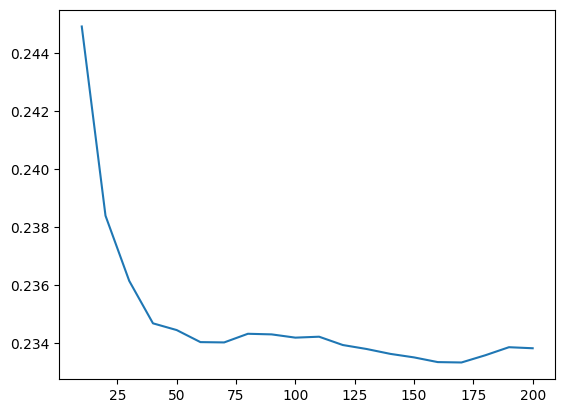

In [44]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

In [45]:
# max_depth 160 is give us lower root mean squar error

# Question 4

In [53]:
scores = []

for depth in [10, 15, 20, 25]:
    for s in range(10, 201, 10):
        dt = DecisionTreeRegressor(max_depth=depth, min_samples_leaf=s, random_state=1)
        dt.fit(X_train_dv, y_train)

        y_pred = dt.predict(X_val_dv)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))

        scores.append((depth, s, rmse))

In [54]:
columns = ['max_depth', 'min_samples_leaf', 'rmse']
df_scores = pd.DataFrame(scores, columns=columns)

In [55]:
df_scores.describe()

,max_depth,min_samples_leaf,rmse
count,80.00000,80.00000,80.000000
mean,17.50000,105.00000,0.290328
std,5.62544,58.02662,0.013062
min,10.00000,10.00000,0.266854
25%,13.75000,57.50000,0.278593
50%,17.50000,105.00000,0.295350
75%,21.25000,152.50000,0.301268
max,25.00000,200.00000,0.305778


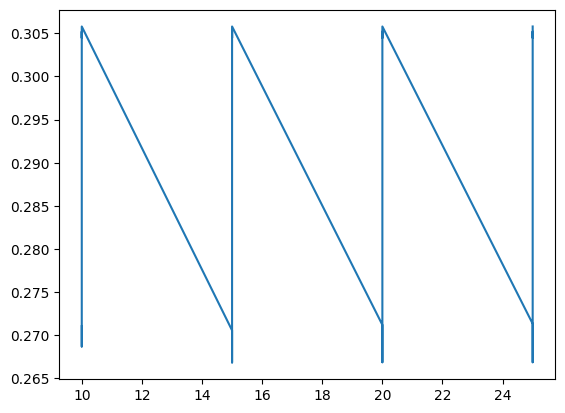

In [56]:
plt.plot(df_scores.max_depth, df_scores.rmse)

In [57]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['rmse'])
df_scores_pivot

rmse                              
max_depth               10        15        20        25
min_samples_leaf                                        
10                0.271061  0.270574  0.271209  0.271338
20                0.268706  0.266854  0.266879  0.266879
30                0.269910  0.269243  0.269243  0.269243
40                0.272660  0.272275  0.272275  0.272275
50                0.275519  0.275158  0.275158  0.275158
60                0.279618  0.279679  0.279679  0.279679
70                0.284282  0.284245  0.284245  0.284245
80                0.288701  0.288669  0.288669  0.288669
90                0.293402  0.293402  0.293402  0.293402
100               0.295225  0.295225  0.295225  0.295225
110               0.295474  0.295474  0.295474  0.295474
120               0.295833  0.295833  0.295833  0.295833
130               0.296587  0.296587  0.296587  0.296587
140               0.298063  0.298063  0.298063  0.298063
150               0.300608  0.300608  0.300608  0.300608
160               0.303246  0.303246  0.303246  0.303246
170               0.305176  0.305176  0.305176  0.305176
180               0.304457  0.304457  0.304457  0.304457
190               0.304702  0.304702  0.304702  0.304702
200               0.305778  0.305778  0.305778  0.305778

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

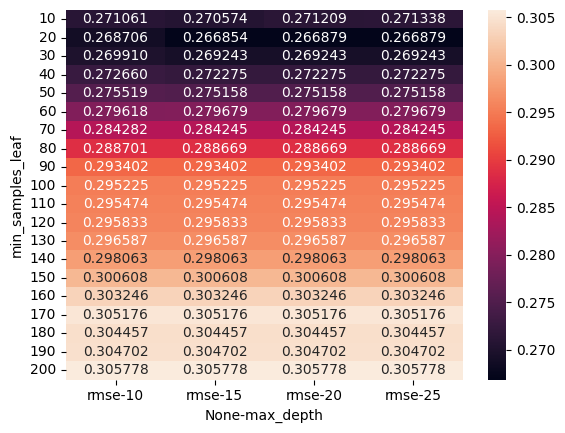

In [58]:
import seaborn as sns
sns.heatmap(df_scores_pivot, annot=True, fmt=".6f")

In [59]:
# max_depth = 15, min_samples_leaf = 20k

In [60]:
#rmse is less in max_depth 15

# Question 5:

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
rndf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

In [63]:
rndf.fit(X_train_dv, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [64]:
# feature_name
feature_name = list(dv.get_feature_names_out())
feature_name

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [65]:
# Get the feature importances
importance_scores = rndf.feature_importances_

importance_scores

array([0.01446473, 0.03001848, 0.10249128, 0.08603838, 0.33554034,
       0.21881985, 0.14745955, 0.02827243, 0.01573663, 0.02115832])

In [66]:
for column, importance in zip(feature_name, importance_scores):
  print(column,':',importance)

households : 0.014464729672647775
housing_median_age : 0.03001847738030148
latitude : 0.10249128069337625
longitude : 0.08603838292900823
median_income : 0.3355403365620536
ocean_proximity=<1H OCEAN : 0.2188198543307832
ocean_proximity=INLAND : 0.14745955406828115
population : 0.028272427270634358
total_bedrooms : 0.015736633318908736
total_rooms : 0.021158323774005144


In [67]:
# most important feature is median_income

# Question 6 :

In [68]:
!pip install xgboost

In [69]:
y_val

14481    12.091228
14015    12.141539
9749     11.478344
5770     11.940159
6634     12.367345
           ...    
4647     11.850119
8444     12.404108
10263    12.616860
710      11.036517
11196    11.651826
Name: median_house_value, Length: 3138, dtype: float64

In [70]:
import xgboost as xgb

In [71]:
features = dv.get_feature_names_out()
# Remove characters [, ], and <
cleaned_features = [f.replace('[', '').replace(']', '').replace('<', '') for f in features]
dtrain = xgb.DMatrix(X_train_dv, label=y_train, feature_names=cleaned_features)
dval = xgb.DMatrix(X_val_dv, label=y_val, feature_names=cleaned_features)

In [72]:
cleaned_features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=1H OCEAN',
 'ocean_proximity=INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [73]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [74]:
y_pred = model.predict(dval)

In [75]:
np.sqrt(mean_squared_error(y_val, y_pred))

0.228623199980106

In [76]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

y_pred = model.predict(dval)

np.sqrt(mean_squared_error(y_val, y_pred))

0.23208927121609343

In [77]:
# eta 0.3 provide give lowest rmse